Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.



In [1]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
from distribuciones import diagonal, paralelo
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

In [3]:
C = 0.78
n_train = 250
n_test  = 10000
D_values = [2,4,8,16,32]
trainingsets = 20

In [4]:
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1

In [6]:
error_mean_training = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training[i] = np.mean(error_training[i,:])

error_mean_test = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test[i] = np.mean(error_test[i,:])

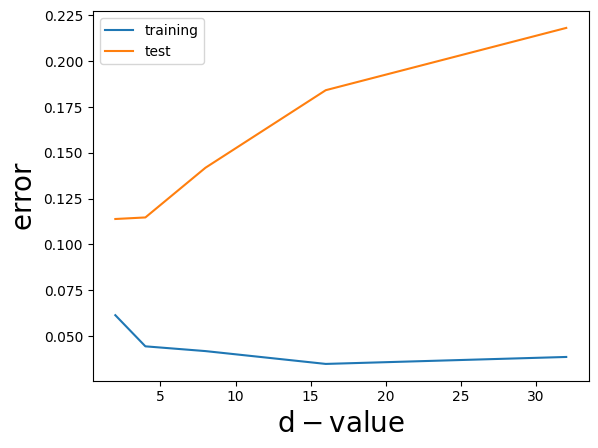

In [7]:
plt.plot(D_values,error_mean_training,label='training')
plt.plot(D_values,error_mean_test,label='test')
plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()